In [199]:
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_27360\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [210]:
df

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at,salary_mean,year,year-month
1,Broadcast encryption engineer,NaN,2000.0,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300,63568.80,2003,2003-01
2,Embedded OS engineering manager,NaN,2000.0,2000.0,USD,Москва,2003-01-31T18:25:43+0300,63568.80,2003,2003-01
10,Менеджер по продвижению программных продуктов,NaN,1000.0,1000.0,USD,Москва,2003-04-01T18:28:37+0400,31380.10,2003,2003-04
11,Технический писатель,NaN,300.0,300.0,USD,Москва,2003-04-01T18:35:22+0400,9414.03,2003,2003-04
12,Бизнес-аналитик,NaN,1200.0,1200.0,USD,Москва,2003-05-14T16:18:16+0400,37322.52,2003,2003-05
...,...,...,...,...,...,...,...,...,...,...
6332703,Системный администратор,Настройка ПО\nНастройка ПК\nНастройка сетевых ...,1600.0,1600.0,BYR,Минск,2023-12-09T19:19:37+0300,1600.00,2023,2023-12
6332704,Аналитик данных Data Science,SQL\nTableau\nРабота с базами данных\nСтатисти...,250000.0,270000.0,RUR,Санкт-Петербург,2023-12-09T20:07:32+0300,260000.00,2023,2023-12
6332707,Ведущий специалист по сопровождению SIEM платф...,SIEM\nPython\nLinux\nИнформационная безопасность,300000.0,300000.0,RUR,Москва,2023-12-09T20:35:54+0300,300000.00,2023,2023-12
6332709,Motion designer,Adobe After Effect\nОбработка видео\nАнимация\...,400.0,2000.0,EUR,Санкт-Петербург,2023-12-09T21:34:51+0300,1200.00,2023,2023-12


In [218]:
df[df['year-month'] == '2023-05']

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at,salary_mean,year,year-month
5905773,Middle .Net Developer,C#\n.NET Framework\nMS SQL,1500.0,2300.0,USD,Ташкент,2023-05-01T00:00:54+0300,152967.67,2023,2023-05
5905774,Junior .Net Developer,C#\n.NET Framework\nMS SQL,1000.0,1000.0,USD,Астана,2023-05-01T00:03:46+0300,80509.30,2023,2023-05
5905775,Junior .Net Developer,C#\n.NET Framework\nMS SQL,1000.0,1000.0,USD,Ташкент,2023-05-01T00:04:10+0300,80509.30,2023,2023-05
5905776,Senior .Net Developer,C#\n.NET Framework\nMS SQL,2000.0,3000.0,USD,Астана,2023-05-01T00:08:51+0300,201273.25,2023,2023-05
5905777,Senior .Net Developer,C#\n.NET Framework\nMS SQL,2000.0,3000.0,USD,Ташкент,2023-05-01T00:09:25+0300,201273.25,2023,2023-05
...,...,...,...,...,...,...,...,...,...,...
5964943,Senior Full Stack Engineer (Laravel & JavaScript),JavaScript\nGit\nVanilla\nLaravel,3000.0,5000.0,USD,Москва,2023-05-31T22:32:29+0300,322037.20,2023,2023-05
5964950,Senior/Middle Data Analyst,Data Analysis\nPython\nSQL\nA/B тесты\nАнализ ...,3500.0,4300.0,EUR,Москва,2023-05-31T22:44:29+0300,344647.68,2023,2023-05
5964952,Консультант 1С (стажер),1С: Бухгалтерия\n1С: Управление Торговлей\nРаб...,25000.0,50000.0,RUR,Нижний Новгород,2023-05-31T22:47:10+0300,37500.00,2023,2023-05
5964961,Программист 1С,NaN,250000.0,250000.0,RUR,Москва,2023-05-31T23:08:43+0300,250000.00,2023,2023-05


In [88]:
df.head()

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300


In [105]:
df.describe()

,salary_from,salary_to,salary_mean
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332712 entries, 0 to 6332711
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   name             object 
 1   key_skills       object 
 2   salary_from      float64
 3   salary_to        float64
 4   salary_currency  object 
 5   area_name        object 
 6   published_at     object 
dtypes: float64(2), object(5)
memory usage: 338.2+ MB


In [174]:
df['year-month']

1          2003-01
2          2003-01
10         2003-04
11         2003-04
12         2003-05
            ...   
6332703    2023-12
6332704    2023-12
6332707    2023-12
6332709    2023-12
6332711    2023-12
Name: year-month, Length: 3266501, dtype: object

In [201]:
df.dropna(subset=['salary_currency'],inplace=True)

In [175]:
df['year'].unique()

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [202]:
df.loc[(df['salary_to'].isnull()), 'salary_to'] = df['salary_from']
df.loc[(df['salary_from'].isnull()), 'salary_from'] = df['salary_to']

In [203]:
df.insert(7, "salary_mean", (df['salary_from'] + df['salary_to']) / 2, True)

In [189]:
df_cur = pd.read_csv("valutes.csv")

In [211]:
df_cur

,date,BYR,USD,EUR,KZT,UAH,AZN,KGS,UZS,GEL
0,2003-01,0.016425,31.7844,33.2719,0.203925,5.94190,NaN,NaN,NaN,NaN
1,2003-02,0.016256,31.8345,34.4290,0.205576,5.94182,NaN,NaN,NaN,NaN
2,2003-03,0.015989,31.5729,33.9409,0.208194,5.89454,NaN,NaN,NaN,NaN
3,2003-04,0.015696,31.3801,33.9815,0.206202,5.85471,NaN,NaN,NaN,NaN
4,2003-05,0.015331,31.1021,34.5513,0.204875,5.77205,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
241,2023-02,NaN,70.5174,76.3004,0.153325,1.90963,41.4808,0.818542,0.006240,26.7010
242,2023-03,NaN,74.8932,79.5134,0.166748,2.03132,44.0548,0.856706,0.006616,28.5069
243,2023-04,NaN,77.3233,84.1116,0.172577,2.09349,45.4843,0.884504,0.006763,30.1997
244,2023-05,NaN,80.5093,88.3712,0.176474,2.18067,47.3584,0.919896,0.007068,32.2153


In [204]:
def cur_to_rub(time, cur, salary):
    if cur == 'RUR':
        return salary
    if time in df_cur['date'].to_list():
        return salary * df_cur[cur][df_cur['date']== time].iloc[0]
    else: return salary


In [205]:
df.insert(8, "year", df.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [206]:
df.insert(9, "year-month", df.apply(lambda row: '-'.join(row.published_at.split('-')[:2]), axis=1), True)

In [207]:
df['salary_mean'] = df.apply(lambda row: cur_to_rub(row['year-month'],
                                                    row['salary_currency'], row['salary_mean']),axis=1)

In [216]:
df = df[df['year-month'] <= '2023-06']

In [217]:
df

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at,salary_mean,year,year-month
1,Broadcast encryption engineer,NaN,2000.0,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300,63568.80,2003,2003-01
2,Embedded OS engineering manager,NaN,2000.0,2000.0,USD,Москва,2003-01-31T18:25:43+0300,63568.80,2003,2003-01
10,Менеджер по продвижению программных продуктов,NaN,1000.0,1000.0,USD,Москва,2003-04-01T18:28:37+0400,31380.10,2003,2003-04
11,Технический писатель,NaN,300.0,300.0,USD,Москва,2003-04-01T18:35:22+0400,9414.03,2003,2003-04
12,Бизнес-аналитик,NaN,1200.0,1200.0,USD,Москва,2003-05-14T16:18:16+0400,37322.52,2003,2003-05
...,...,...,...,...,...,...,...,...,...,...
6022717,Специалист технической поддержки/ IT инженер,Настройка ПО\nзнания AD\nАдминистрирование сер...,70000.0,70000.0,RUR,Москва,2023-06-30T22:48:40+0300,70000.00,2023,2023-06
6022718,Программист микроконтроллеров (C),Микроконтроллеры\nЖелание учиться\nC,160000.0,160000.0,RUR,Санкт-Петербург,2023-06-30T22:51:41+0300,160000.00,2023,2023-06
6022719,Моушн-дизайнер,NaN,35000.0,55000.0,RUR,Калуга,2023-06-30T23:07:06+0300,45000.00,2023,2023-06
6022722,Специалист по работе с AI / контент-менеджер,Английский язык\nПользователь ПК\nГрамотная ре...,30000.0,30000.0,RUR,Санкт-Петербург,2023-06-30T23:38:07+0300,30000.00,2023,2023-06


In [249]:
df = df[df.salary_to != 100000000.0]

In [250]:
df_group_year = df.groupby(by="year")

In [251]:
df_group_year

In [252]:
years = [str(x+1) for x in range(2002,2023)]

In [253]:
year_salary = {}
for year in years:
    year_salary[year] = df_group_year.get_group(year)['salary_mean'].mean()

In [254]:
df_group_year.get_group('2005')['salary_mean']

9816      19424.09
9824     110994.80
9827      41623.05
9829      41623.05
9830      49947.66
           ...    
25832     28779.20
25833     28779.20
25835     21584.40
25836     86337.60
25837     25901.28
Name: salary_mean, Length: 9363, dtype: float64

In [255]:
df_group_year.get_group('2005')['salary_mean']

9816      19424.09
9824     110994.80
9827      41623.05
9829      41623.05
9830      49947.66
           ...    
25832     28779.20
25833     28779.20
25835     21584.40
25836     86337.60
25837     25901.28
Name: salary_mean, Length: 9363, dtype: float64

In [256]:
year_salary

{'2003': 41304.95041859813,
 '2004': 42967.52186096714,
 '2005': 75516.58993167788,
 '2006': 41317.91754572798,
 '2007': 44449.49173313794,
 '2008': 48411.22144454465,
 '2009': 44811.747280171905,
 '2010': 44657.898453498696,
 '2011': 46448.52379689614,
 '2012': 47969.24510060916,
 '2013': 53542.00004683564,
 '2014': 49077.03917491995,
 '2015': 51734.739138226476,
 '2016': 61305.709055171115,
 '2017': 60364.01400764505,
 '2018': 65581.98110691713,
 '2019': 69938.33329095523,
 '2020': 73111.31651559465,
 '2021': 105412.51086555934,
 '2022': 92382.78852420738,
 '2023': 94554.20548006034}

In [257]:
df_vac = df[df["name"].str.contains("python|питон|пайтон")]

In [258]:
df_group_year_vac = df_vac.groupby(by="year")

In [259]:
year_salary_vac = {}
for year in years:
    try:
        year_salary_vac[year] = df_group_year_vac.get_group(year)['salary_mean'].mean()
    except:
        continue

In [260]:
year_salary_vac

{'2006': 34009.003333333334,
 '2008': 47076.899999999994,
 '2009': 65714.28571428571,
 '2010': 53727.27272727273,
 '2011': 70000.0,
 '2012': 64999.94117647059,
 '2013': 76950.17151162791,
 '2014': 69134.61538461539,
 '2015': 84768.70999999999,
 '2016': 90927.60354166666,
 '2017': 105367.94388888888,
 '2018': 121804.88958333332,
 '2019': 122343.61944444444,
 '2020': 108711.88044444445,
 '2021': 157090.4480141844,
 '2022': 209574.92771966525,
 '2023': 147605.46896551724}

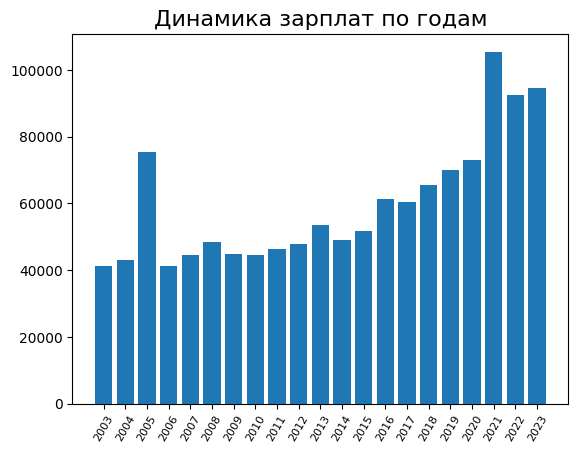

In [261]:
plt.bar(year_salary.keys(),year_salary.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика зарплат по годам',size=16)
plt.show()

In [262]:
df_year_to_html = pd.DataFrame(list(year_salary.items ()), columns = ['Год', 'Средняя ЗП'])

In [263]:
df_year_to_html.to_html('year_to_html.html')

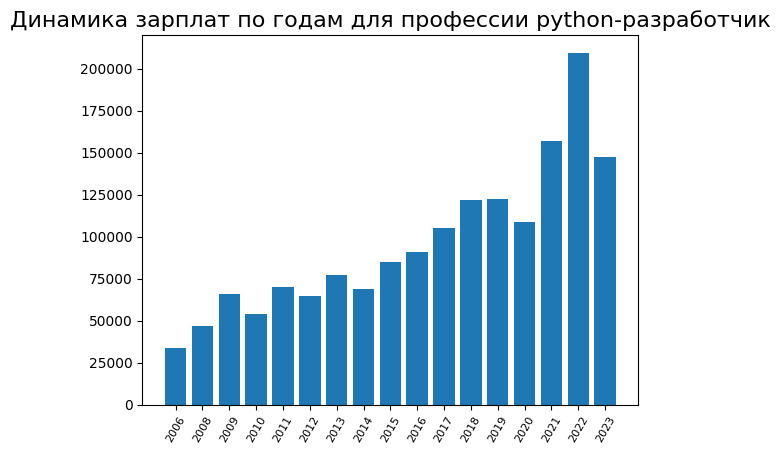

In [264]:
plt.bar(year_salary_vac.keys(),year_salary_vac.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика зарплат по годам для профессии python-разработчик',size=16)
plt.show()

In [265]:
df_year_vac_to_html = pd.DataFrame(list(year_salary_vac.items ()), columns = ['Год', 'Средняя ЗП'])

In [266]:
df_year_vac_to_html.to_html('year_vac_to_html')

In [272]:
df_copy = pd.read_csv('vacancies.csv')

C:\Users\ostan\AppData\Local\Temp\ipykernel_27360\664475122.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv('vacancies.csv')


In [269]:
df_copy

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300
...,...,...,...,...,...,...,...
6332707,Ведущий специалист по сопровождению SIEM платф...,SIEM\nPython\nLinux\nИнформационная безопасность,NaN,300000.0,RUR,Москва,2023-12-09T20:35:54+0300
6332708,PHP-программист,MySQL\nPHP\nPostgreSQL\nHTML\nJavaScript\njQue...,NaN,NaN,NaN,Гомель,2023-12-09T20:48:22+0300
6332709,Motion designer,Adobe After Effect\nОбработка видео\nАнимация\...,400.0,2000.0,EUR,Санкт-Петербург,2023-12-09T21:34:51+0300
6332710,Дизайнер интерьеров,3D Моделирование\nпунктуальность\nArchiCAD\nSk...,NaN,NaN,NaN,Тамбов,2023-12-09T21:47:33+0300


In [273]:
df_copy.insert(7, "year", df_copy.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [276]:
df_copy_group_year_count = df_copy.groupby(by="year")

In [277]:
year_salary_count = {}
for year in years:
    try:
        year_salary_count[year] = len(df_copy_group_year_count.get_group(year))
    except:
        continue

In [283]:
df_year_salary_count_html = pd.DataFrame(list(year_salary_count.items ()), columns = ['Год', 'Средняя ЗП'])

In [284]:
df_year_salary_count_html.to_html('year_count_to_html.html')

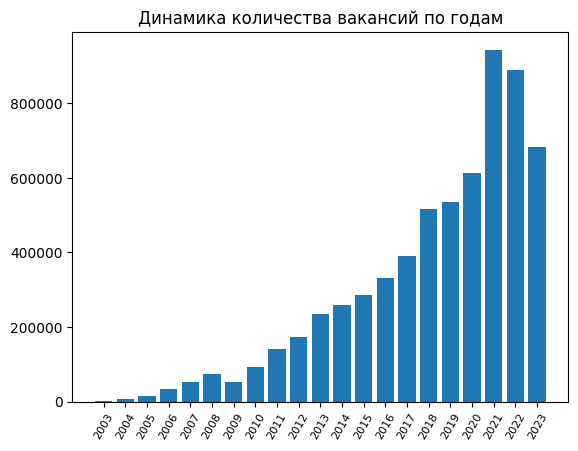

In [279]:
plt.bar(year_salary_count.keys(),year_salary_count.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика количества вакансий по годам')
plt.show()

In [274]:
df_copy_vac = df_copy[df_copy["name"].str.contains("python|питон|пайтон")]

In [275]:
df_copy_group_year_vac_count = df_copy_vac.groupby(by="year")

In [278]:
year_salary_count_vac = {}
for year in years:
    try:
        year_salary_count_vac[year] = len(df_copy_group_year_vac_count.get_group(year))
    except:
        continue

In [285]:
df_year_salary_count_vac_html = pd.DataFrame(list(year_salary_count_vac.items ()), columns = ['Год', 'Средняя ЗП'])

In [286]:
df_year_salary_count_vac_html.to_html('year_count_vac_to_html.html')

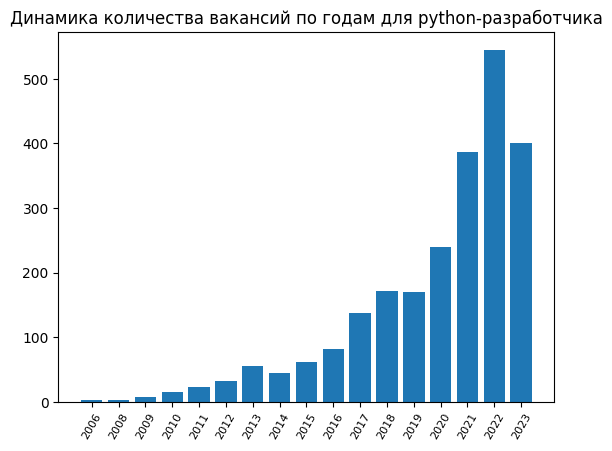

In [280]:
plt.bar(year_salary_count_vac.keys(),year_salary_count_vac.values())
plt.xticks(rotation=60, size=8)
plt.title('Динамика количества вакансий по годам для python-разработчика')
plt.show()